In [1]:
import sys
sys.path.append('..')

DATASET_DIR = r'./datasets/icdar2015'
TRAIN_DATASET_DIR = f'{DATASET_DIR}/train'
TRAIN_TRANSCRIPTS_PATH = f'{DATASET_DIR}/train.txt'
TEST_DATASET_DIR = f'{DATASET_DIR}/test'
TEST_TRANSCRIPTS_PATH = f'{DATASET_DIR}/test.txt'

HEIGHT, WIDTH = 32, 100
PADDING_CHAR = '[PAD]'
BATCH_SIZE = 32

## Prepare the Data

In [2]:
import re
from string import printable

def is_clean_text(text):
    valid_chars = r'\sáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ'
    pattern = re.compile(f'[{valid_chars}{re.escape(printable)}]')
    return bool(re.search(pattern, text.lower()))

In [3]:
from tfseqrec.loader import DataImporter, DataHandler

train_dataset = DataImporter(
    dataset_dir = TRAIN_DATASET_DIR, # Path to the dataset directory
    labels_path = TRAIN_TRANSCRIPTS_PATH, # Path to the labels file
    min_length = 1, # Minimum length of the sentences
    # filter_func = is_clean_text # Function to filter out unwanted sentences
)
# Remove sentences containing rare characters and recalculate the vocab frequencies
# train_dataset.remove_rare_chars(threshold=2)

train_handler = DataHandler(train_dataset, img_size=(HEIGHT, WIDTH), padding_char=PADDING_CHAR)
print('Training samples count:', train_dataset, sep='\n')

4468it [00:00, 44855.97it/s]

Training samples count:
- Number of images found: 4468
- Number of labels found: 4468
- Number of unique characters: 87
- Characters present: {'E': 1482, 'A': 1235, 'S': 1208, 'e': 1082, 'O': 1013, 'T': 920, 'I': 885, 'R': 866, 'a': 860, 'N': 807, 'L': 774, 'o': 687, 'r': 667, 'i': 666, 'n': 625, 'C': 608, 't': 583, 's': 577, 'l': 427, 'H': 411, 'P': 407, 'D': 397, 'M': 378, 'G': 354, 'B': 341, 'U': 333, 'c': 331, 'h': 308, 'u': 299, 'F': 271, 'd': 260, 'Y': 237, 'm': 216, '0': 207, 'p': 203, 'W': 186, '1': 186, 'g': 173, 'K': 173, 'y': 165, 'V': 162, 'f': 141, '2': 124, 'v': 123, 'X': 113, 'k': 101, 'w': 99, '.': 98, 'b': 93, '5': 81, 'J': 77, '-': 69, '9': 66, ' ': 55, '!': 53, '3': 51, "'": 51, '$': 47, '8': 47, '7': 46, '4': 44, '6': 41, 'Z': 30, 'x': 28, '%': 28, '/': 24, ',': 19, ':': 19, 'Q': 19, '#': 16, 'j': 15, 'z': 12, '&': 9, '\\': 8, '(': 6, '?': 5, ')': 5, '"': 4, '@': 4, ';': 3, 'q': 3, '´': 3, '[': 2, ']': 2, 'É': 1, '=': 1, '+': 1}


In [4]:
test_dataset = DataImporter(
    dataset_dir = TEST_DATASET_DIR, # Path to the dataset directory
    labels_path = TEST_TRANSCRIPTS_PATH, # Path to the labels file
    min_length = 1, # Minimum length of the sentences
    # filter_func = is_clean_text # Function to filter out unwanted sentences
)
# Remove sentences containing rare characters and recalculate the vocab frequencies
# test_dataset.remove_rare_chars(threshold=2)

test_handler = DataHandler(test_dataset, img_size=(HEIGHT, WIDTH), padding_char=PADDING_CHAR)
print('Test samples count:', test_dataset, sep='\n')

2077it [00:00, 33084.59it/s]

Test samples count:
- Number of images found: 2077
- Number of labels found: 2077
- Number of unique characters: 79
- Characters present: {'E': 839, 'A': 659, 'S': 608, 'O': 511, 'e': 494, 'R': 446, 'T': 435, 'L': 395, 'I': 390, 'N': 385, 'a': 372, 'C': 313, 'o': 298, 'r': 293, 'n': 287, 'i': 282, 't': 270, 's': 239, 'H': 208, 'P': 197, 'G': 184, 'M': 176, 'D': 175, 'l': 160, 'U': 155, 'F': 150, 'B': 145, 'c': 127, 'u': 125, 'h': 123, 'p': 120, 'Y': 118, 'd': 115, 'W': 112, 'K': 96, 'g': 92, 'm': 76, 'X': 76, 'V': 73, 'y': 72, 'f': 70, '0': 55, 'v': 48, '1': 46, 'k': 43, 'b': 43, 'w': 39, '.': 39, ' ': 32, 'J': 30, '5': 25, '3': 21, '2': 20, "'": 20, '-': 19, '7': 17, '!': 15, '%': 14, '8': 11, '$': 11, 'x': 11, '9': 10, '4': 9, 'Q': 9, '#': 8, 'Z': 7, ',': 6, '&': 6, '6': 6, '@': 5, '/': 5, ':': 5, 'j': 4, '?': 2, 'z': 2, '(': 1, 'É': 1, 'é': 1, '+': 1}


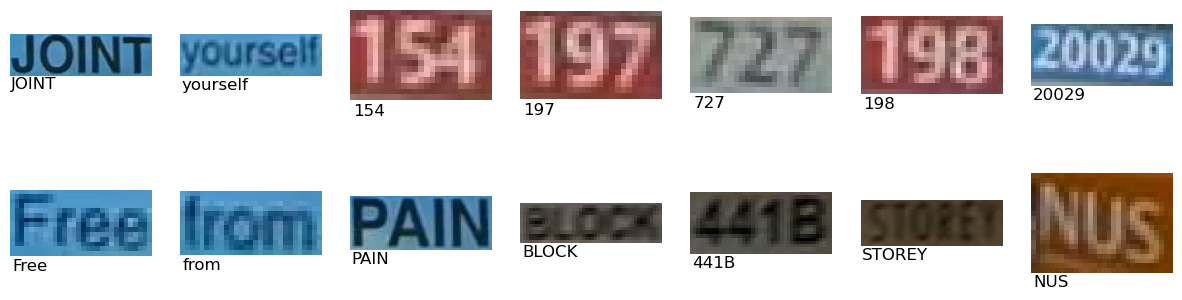

In [5]:
from tfseqrec.visualizer import SequenceVisualizer
seq_vis = SequenceVisualizer(fontsize=12, fontpath=None) # Specify fontpath to render special characters in some languages
seq_vis.plot_images_labels(
    test_dataset.img_paths, test_dataset.labels,
    figsize = (15, 4), subplot_size = (2, 7), # The number of images will be automatically calculated
)

In [6]:
import random
random.seed(2024)

train_idxs = list(range(train_dataset.size))
test_idxs = list(range(test_dataset.size))
random.shuffle(train_idxs)

# When run on a small RAM machine, you can set use_cache=False to
# not run out of memory but it will slow down the training speed
train_tf_dataset = train_handler.prepare_tf_dataset(train_idxs, BATCH_SIZE, channels=3, drop_remainder=False, img_align_top=True, use_cache=True)
test_tf_dataset = test_handler.prepare_tf_dataset(slice(None), BATCH_SIZE, channels=3, drop_remainder=False, img_align_top=True, use_cache=True)